# %% [markdown]
# # Weight Initialization Assignment
# 
# ### Date: [28/12/24]

# %% [markdown]
# ## Part 1: Understanding Weight Initialization

# %% [markdown]
# ### Question 1: Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize the weights carefully?
# ### Answer: 
# 
# Weight initialization is a critical step in training artificial neural networks because it impacts the efficiency and effectiveness of the learning process. Proper weight initialization ensures:
# 
# Stability in training: Prevents gradients from becoming too small (vanishing gradients) or too large (exploding gradients), which can destabilize the training process.
# Faster convergence: Good initialization starts the optimization process close to the solution space, reducing the number of epochs required.
# Symmetry breaking: Ensures that neurons in the same layer learn distinct features rather than producing identical updates during training.
# Avoiding dead neurons: Keeps neuron activations active by preventing initial weights from producing values that lead to zero gradients.
# 

# %% [markdown]
# ### Question 2: Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence?
# ### Answer:
# 
# Improper weight initialization can cause several challenges:
# 
# Vanishing gradients: If weights are too small, the gradients computed during backpropagation diminish across layers, slowing down or halting learning for deep networks.
# Exploding gradients: If weights are too large, the gradients grow exponentially, leading to numerical instability and poor convergence.
# Symmetry problem: Initializing all weights to the same value (e.g., zero) prevents the network from breaking symmetry. Neurons in the same layer learn identical weights, effectively reducing the capacity of the network.
# Slow convergence: Poor initialization places the optimizer far from the optimal solution, increasing the number of iterations required to converge.
# These issues make it challenging to train deep networks effectively, highlighting the importance of choosing proper weight initialization techniques.

# %% [markdown]
# ### Question 3: Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization?
# ### Answer:
# 
# Variance in weight initialization refers to the spread or distribution of initial weight values. Its role in weight initialization is crucial for:
# 
# Maintaining signal flow: Properly scaled variance ensures that signals (activations and gradients) propagate through the network without diminishing or amplifying excessively across layers.
# Avoiding vanishing/exploding gradients: Balancing variance prevents gradients from becoming too small or too large during backpropagation, enabling stable training.
# Improved training dynamics: Techniques like Xavier (Glorot) and He initialization explicitly calculate variance based on the number of input and output connections, ensuring consistent signal magnitudes.
# Choosing appropriate variance for initialization ensures that activations and gradients are neither saturated nor suppressed, facilitating faster convergence and better performance.
# 
# 

# %% [markdown]
# ## Part 2: Weight Initialization Techniques

# %% [markdown]
# ### Question 1: Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use.
# ### Answer:

# %% [markdown]
# ### Question 2: Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradients?
# ### Answer:
# 
# Zero initialization involves setting all the weights in a neural network to zero.
# 
# Advantages: It is simple and computationally efficient.
# Limitations:
# Symmetry problem: If all weights are initialized to zero, every neuron in a layer computes the same output and gradient, making them learn the same features. This significantly reduces the model's capacity to learn.
# Training stagnation: It prevents the network from breaking symmetry, leading to suboptimal learning dynamics.
# When it is appropriate: Zero initialization is suitable only for initializing biases (not weights), as biases do not affect the symmetry breaking necessary for learning.
# 2. Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradients?
# Answer:
# Random initialization assigns small random values to weights, typically drawn from a uniform or normal distribution.
# 
# Advantages: It ensures that neurons in a layer start with different weights, breaking symmetry.
# Issues:
# If weights are too small, activations shrink exponentially across layers, leading to vanishing gradients.
# If weights are too large, activations grow exponentially, causing exploding gradients.
# Adjustments:
# To mitigate these issues, random initialization can be scaled based on the number of inputs or outputs of each layer. For example:
# Scale weights by 
# 1/root n
# ​
#  
# 1
# ​
#  , where 
# 𝑛
# n is the number of inputs to a neuron, as done in Xavier initialization.
# Use distributions with controlled variance to maintain activation magnitudes across layers.
# 

# %% [markdown]
# ### Question 3: Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlying theory behind it.
# ### Answer:
# 
# Xavier (or Glorot) initialization is a method that assigns initial weights using a random distribution with a variance calculated as: 
# Var
# (
# 𝑊
# )
# =
# 2
# 𝑛
# in
# +
# 𝑛
# out
# Var(W)= 
# n 
# in
# ​
#  +n 
# out
# ​
#  
# 2
# ​
#   where 
# 𝑛
# in
# n 
# in
# ​
#   is the number of inputs to a neuron, and 
# 𝑛
# out
# n 
# out
# ​
#   is the number of outputs.
# 
# Advantages:
# Ensures that signals propagate without amplification or attenuation, maintaining activation and gradient magnitudes across layers.
# Improves convergence rates by balancing variance in the forward and backward passes.
# Underlying theory: The method is derived from the assumption that input and output variances should be equal, ensuring consistent signal flow during training.
# Use case: Suitable for networks with activation functions like sigmoid or hyperbolic tangent (tanh), where balanced variances are critical.
# 4. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?
# Answer:
# He initialization modifies Xavier initialization by scaling the variance to focus on the number of inputs: 
# Var
# (
# 𝑊
# )
# =
# 2
# 𝑛
# in
# Var(W)= 
# n 
# in
# ​
#  
# 2
# ​
#  
# where 
# 𝑛
# in
# n 
# in
# ​
#   is the number of inputs to a neuron.
# 
# Advantages:
# It better addresses issues with ReLU and its variants, which can cause dying neurons if initialized improperly.
# Maintains larger gradients for ReLU activations, leading to faster convergence.
# Difference from Xavier initialization: He initialization uses a larger variance, focusing only on the input size rather than balancing both input and output sizes.
# When preferred: He initialization is ideal for networks using ReLU or its variants as activation functions, where larger initial gradients are beneficial.
# 

# %% [markdown]
# ### Question 4: Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?
# ### Answer:

# %% [markdown]
# ## Part 3: Applying Weight Initialization
# 
# ### Importing Necessary Libraries

# %%
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotNormal, HeNormal
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# %% [markdown]
# ### Data Preparation

# %%
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %% [markdown]
# ### Model Building and Initialization Techniques

# %%
def build_model(initializer):
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=initializer, input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid', kernel_initializer=initializer)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initializers
initializers = {
    "Zero Initialization": Zeros(),
    "Random Initialization": RandomNormal(mean=0.0, stddev=1.0),
    "Xavier Initialization": GlorotNormal(),
    "He Initialization": HeNormal()
}

# Train models with different initializations
results = {}
for name, initializer in initializers.items():
    print(f"Training model with {name}...")
    model = build_model(initializer)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    results[name] = history.history

# %% [markdown]
# ### Performance Comparison

# %%
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 6))
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=name)

plt.title('Validation Accuracy by Initialization Technique')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# %% [markdown]
# ### Analysis and Discussion
# [Provide detailed analysis of the results and trade-offs for each technique.]




### Importing Libraries

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotNormal, HeNormal
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

### Data Preparation

In [5]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and Initialization Techniques

In [6]:
def build_model(initializer):
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=initializer, input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid', kernel_initializer=initializer)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initializers
initializers = {
    "Zero Initialization": Zeros(),
    "Random Initialization": RandomNormal(mean=0.0, stddev=1.0),
    "Xavier Initialization": GlorotNormal(),
    "He Initialization": HeNormal()
}

# Train models with different initializations
results = {}
for name, initializer in initializers.items():
    print(f"Training model with {name}...")
    model = build_model(initializer)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    results[name] = history.history

Training model with Zero Initialization...


C:\Users\Vivek\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with Random Initialization...
Training model with Xavier Initialization...
Training model with He Initialization...


## Performance Comparision

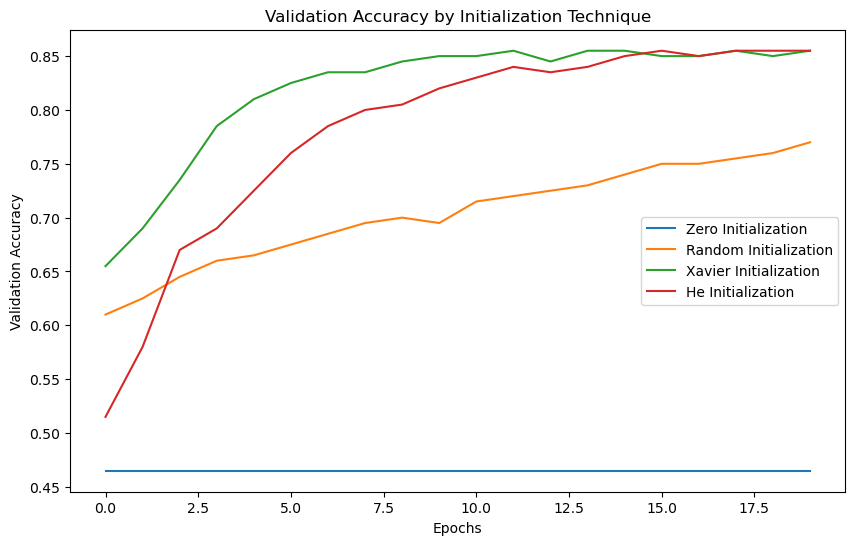

In [7]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 6))
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=name)

plt.title('Validation Accuracy by Initialization Technique')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()